[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_yolov5.ipynb)

# Inference on YOLOv8 using Slicing Aided Hyper Inference Technique

## For this inference notebook, packages such as SAHI, Ultralytics, OpenCV and NumPy are required to be installed. 



**NOTE:** After running this cell, the runtime needs to be restarted. After that is done, you can continue with the other cells. 

For restarting the runtime, follow this:



1.   Runtime -> Restart Runtime 
2.   (or) just press *Ctrl + M* 






In [1]:
# Install necessary packages
!pip install -U torch sahi yolov8 ultralytics numpy opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.4/595.4 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.3/953.3 kB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 125.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/

In [1]:
# Check current working directory
import os
os.getcwd()

'/content'

## In this inference notebook, we will be using a pretrained YOLOv8-S model, as the Object Detector.

This cell imports the model functions and classes from the SAHI directory.

In [2]:
# Import YOLOv8-S model
from sahi.utils.yolov8 import (
    download_yolov8s_model,
)

# Import required functions and classes
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from sahi.prediction import visualize_object_predictions
from IPython.display import Image
from numpy import asarray
import cv2

This cell downloads the YOLOv8-S model and few test_images to perform inference.

In [3]:
# Download YOLOv8-S model to 'models/yolov8s.pt'
yolov8_model_path = 'models/yolov8s.pt'
download_yolov8s_model(destination_path=yolov8_model_path)

# Download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

# Perform Inference on YOLOv8-S model (without and with SAHI)

In this cell, a detection model has been initialized by defining the model weight path, and other necessary parameters such as confidence_threshold and device.

**NOTE:** If you have an Nvidia GPU for CUDA acceleration, then set `device='cuda:0'` otherwise, leave it as `device='cpu'`.

In [4]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_model_path,
    confidence_threshold=0.3,
    device="cuda:0", # or 'cpu'
)

## Perform Inference and Visualize (without SAHI)

In [5]:
# Example 1
result = get_prediction("demo_data/bridge.png", detection_model)

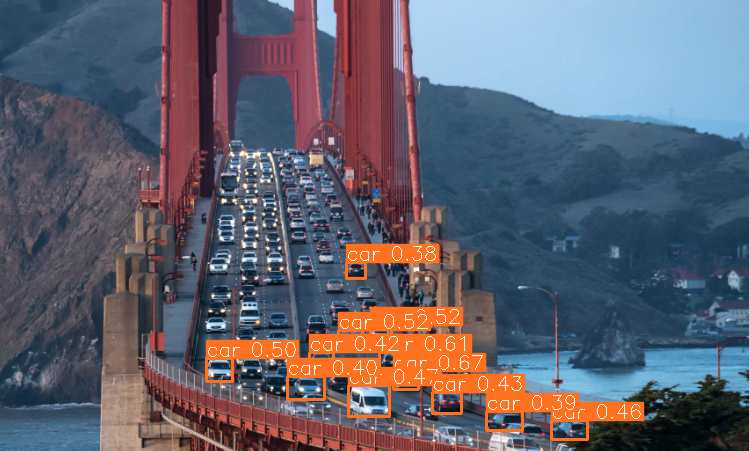

In [6]:
# Example 1
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [7]:
# Example 2 
result = get_prediction("demo_data/bird.jpg", detection_model)

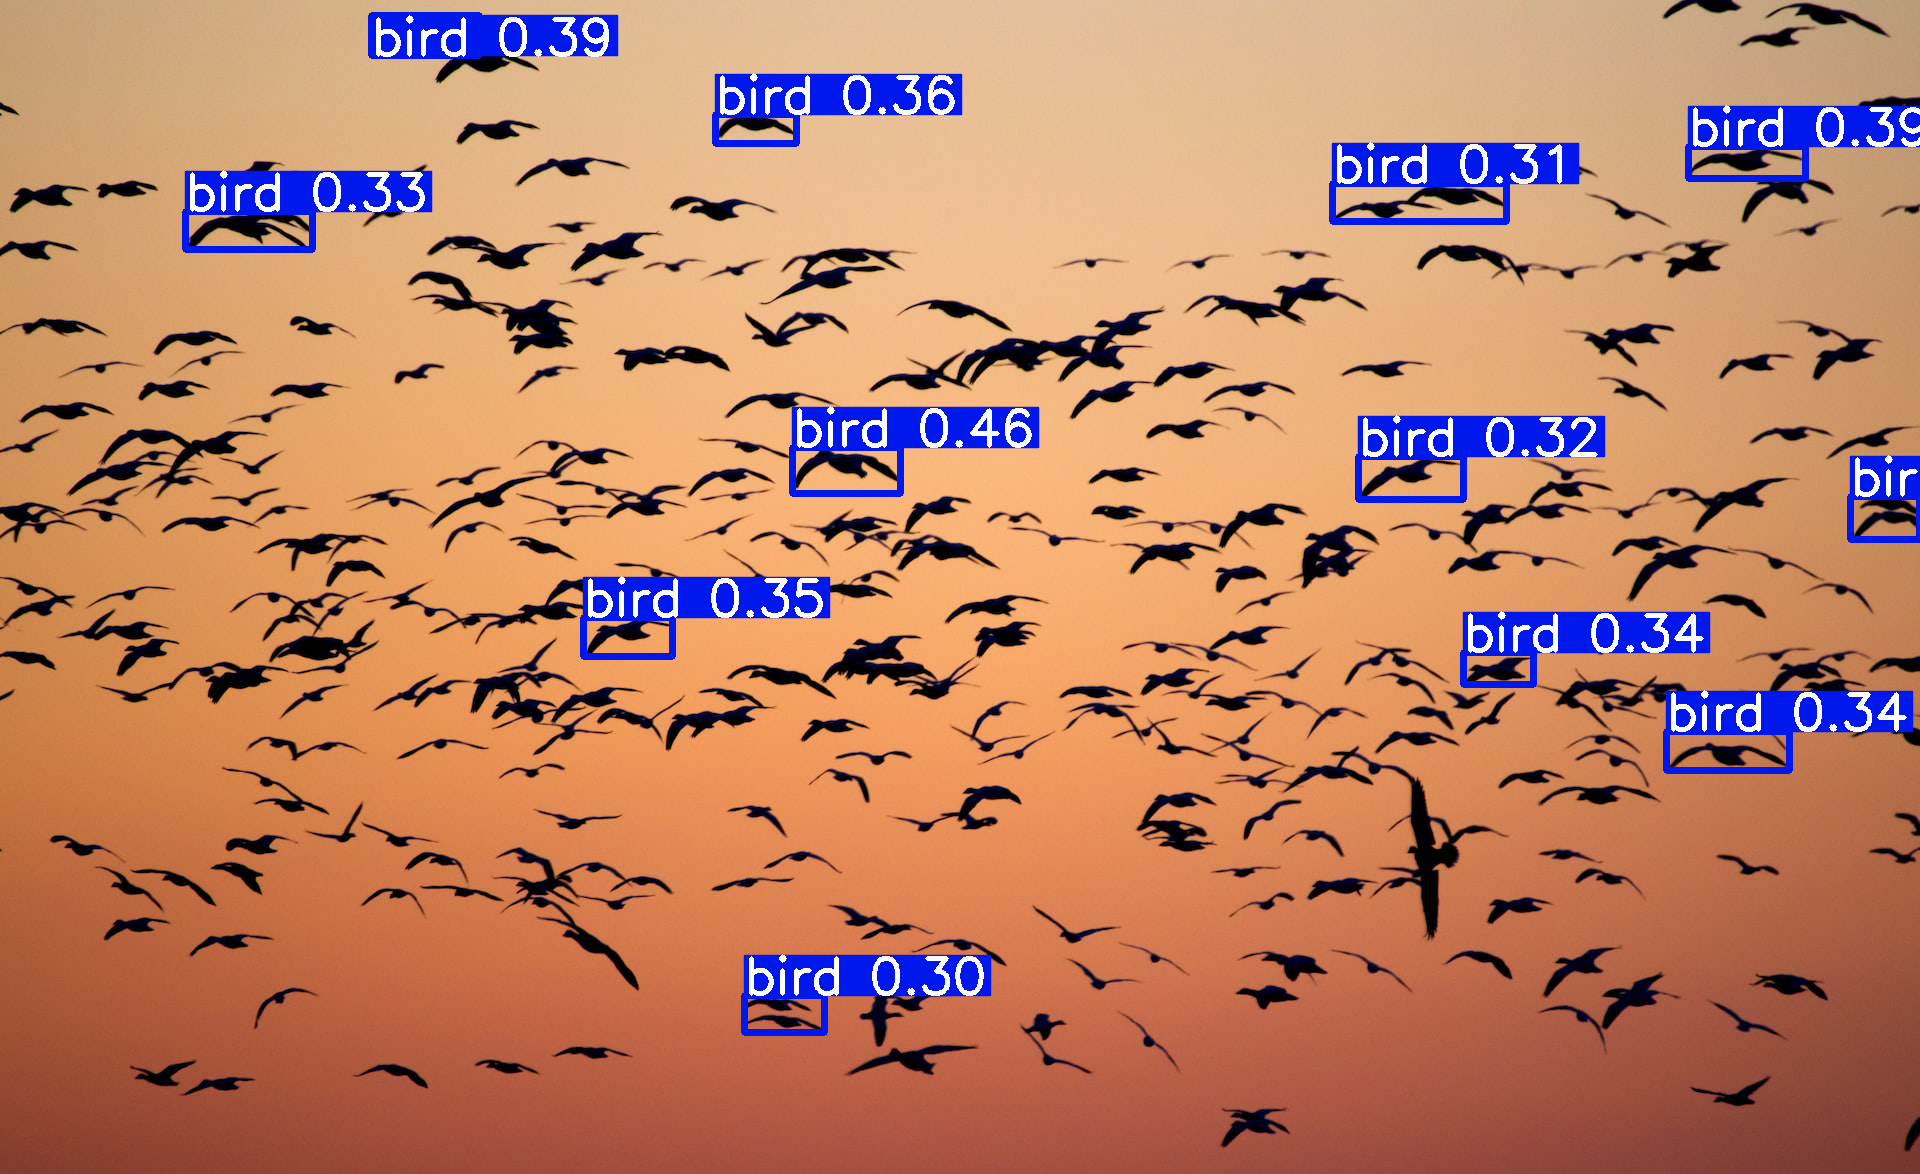

In [8]:
# Example 2
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [9]:
# Example 3
result = get_prediction("demo_data/cars.jpg", detection_model)

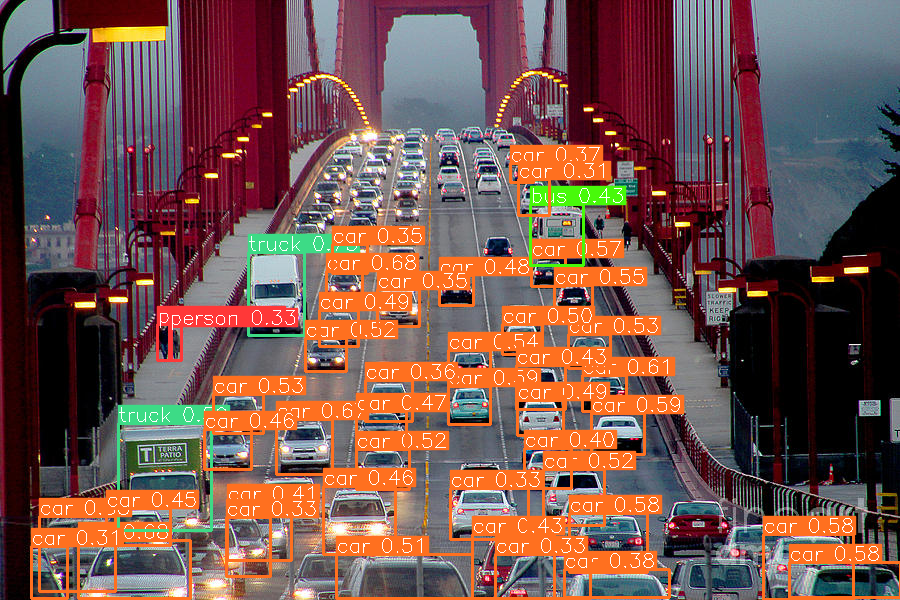

In [10]:
# Example 3
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## Perform Sliced Inference (with SAHI)

**NOTE:** To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 512x512 with an overlap ratio of 0.2:

Please feel free to experiement with different `slice_height` and `slice_width`, `overlap_height_ratio`, and `overlap_width_ratio` parameters. More compute is required for more number of slices.

In [14]:
# Example 1
result = get_sliced_prediction(
    "demo_data/bridge.png",
    detection_model,
    slice_height = 128,
    slice_width = 128,
    overlap_height_ratio = 0.7,
    overlap_width_ratio = 0.7
)

Performing prediction on 170 number of slices.


## Visualize predicted bounding boxes over the same image (with SAHI)

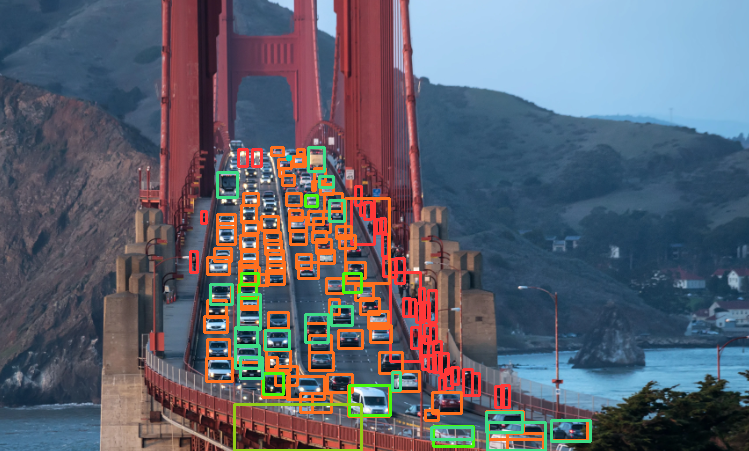

In [15]:
img = cv2.imread("demo_data/bridge.png", cv2.IMREAD_UNCHANGED)
img_converted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
numpydata = asarray(img_converted)
visualize_object_predictions(
    numpydata, 
    object_prediction_list = result.object_prediction_list,
    hide_labels = 1, 
    output_dir='/content/demo_data',
    file_name = 'result',
    export_format = 'png'
)
Image('demo_data/result.png')

In [12]:
# Example 2
result = get_sliced_prediction(
    "demo_data/bird.jpg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 60 number of slices.


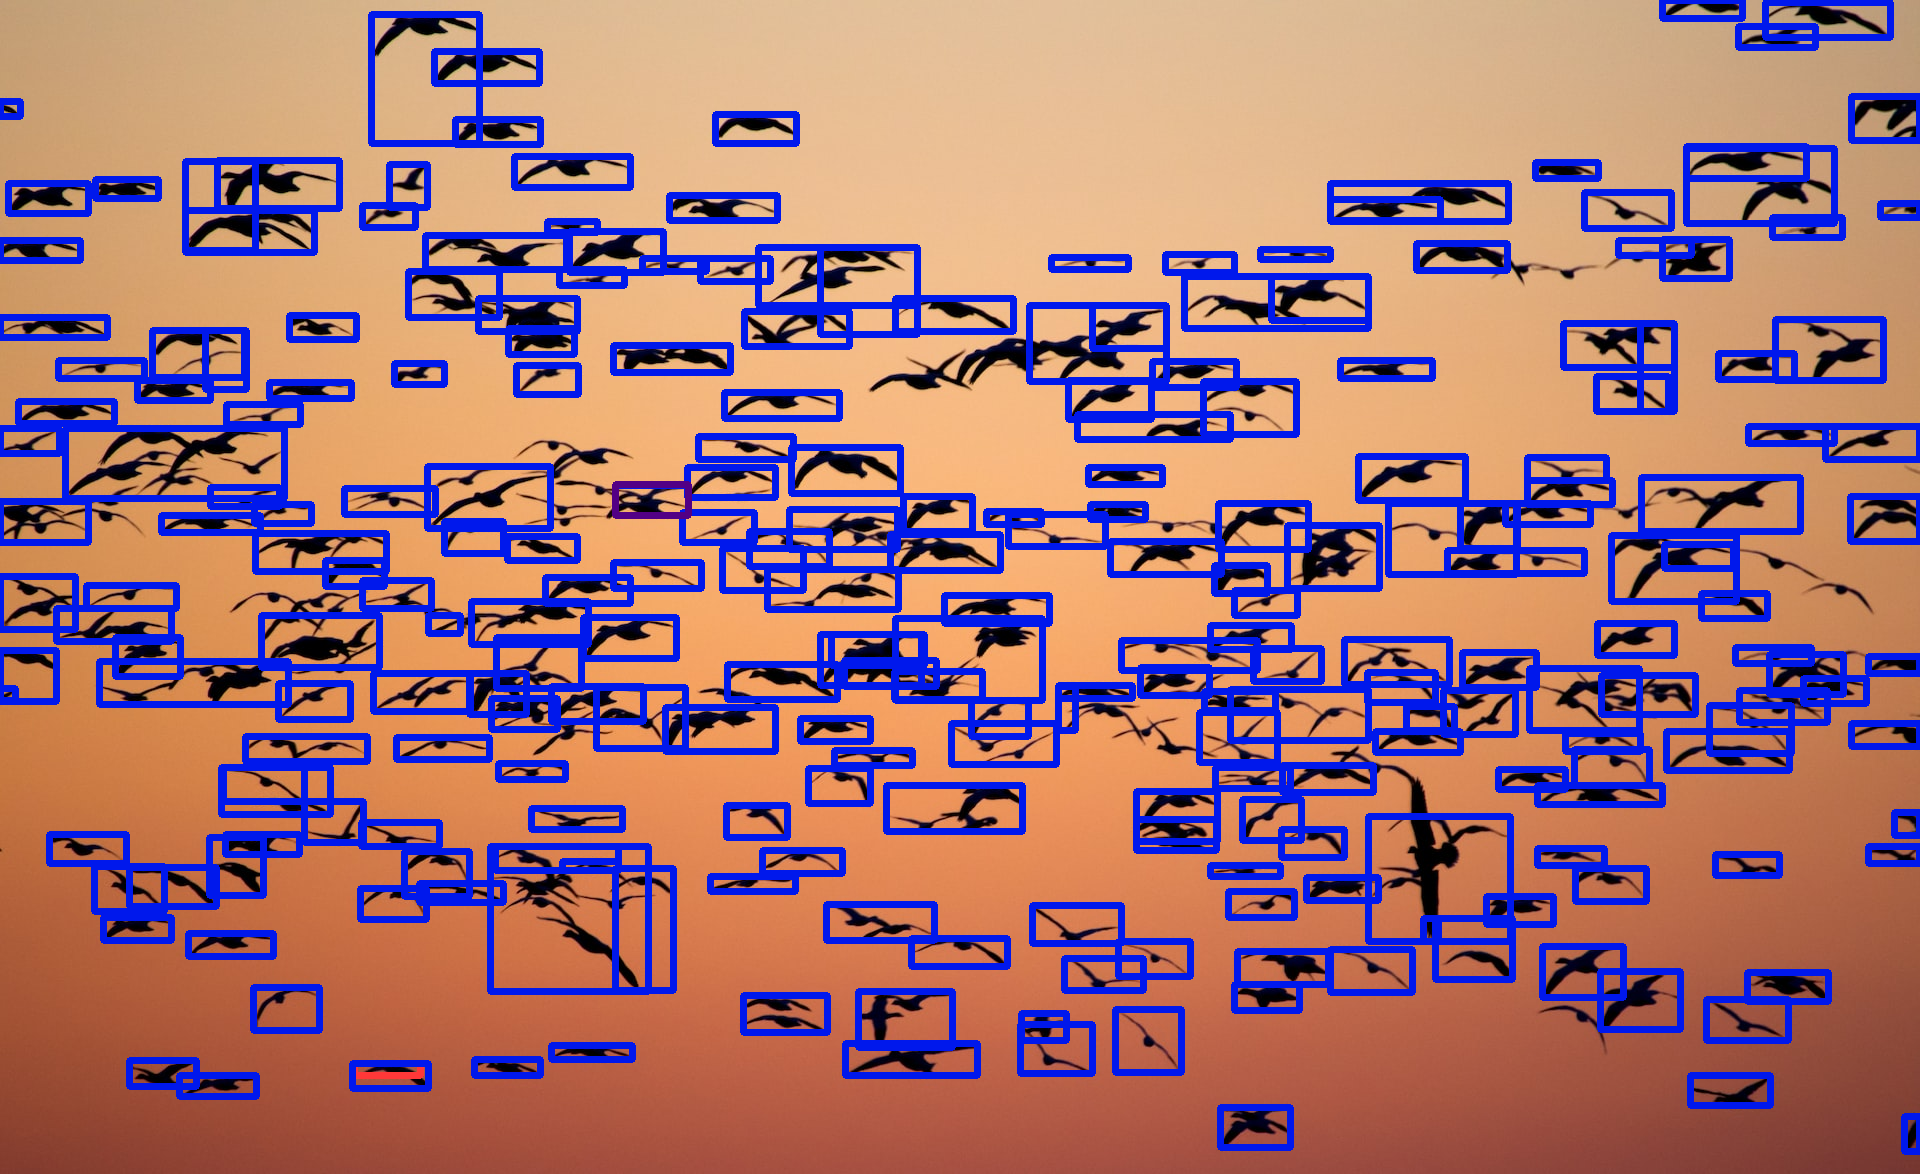

In [13]:
img = cv2.imread("demo_data/bird.jpg", cv2.IMREAD_UNCHANGED)
img_converted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
numpydata = asarray(img_converted)
visualize_object_predictions(
    numpydata, 
    object_prediction_list = result.object_prediction_list,
    hide_labels = 1, 
    output_dir='/content/demo_data',
    file_name = 'result',
    export_format = 'png'
)
Image('demo_data/result.png')

In [56]:
# Example 3
result = get_sliced_prediction(
    "demo_data/cars.jpg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.9,
    overlap_width_ratio = 0.9
)

Performing prediction on 390 number of slices.


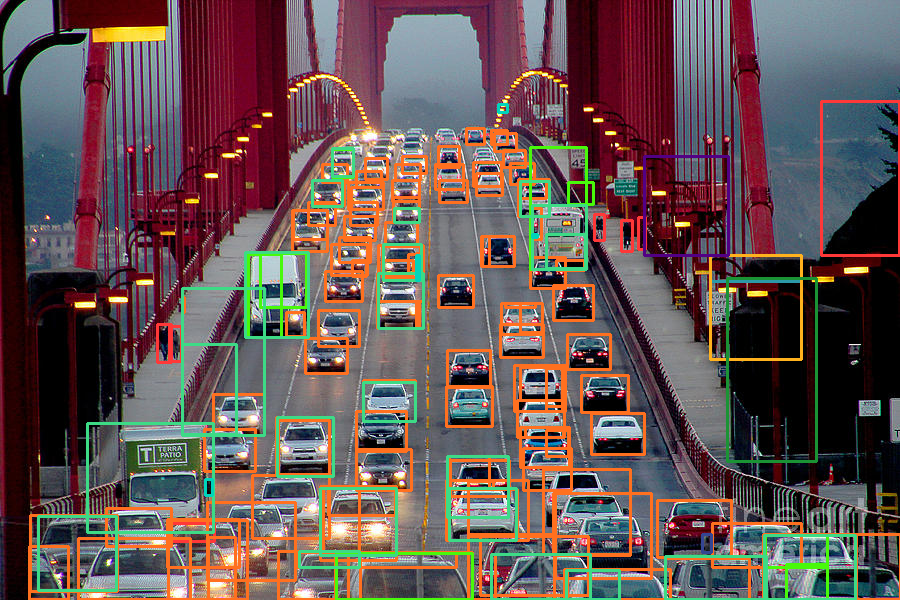

In [57]:
img = cv2.imread("demo_data/cars.jpg", cv2.IMREAD_UNCHANGED)
img_converted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
numpydata = asarray(img_converted)
visualize_object_predictions(
    numpydata, 
    object_prediction_list = result.object_prediction_list,
    hide_labels = 1, 
    output_dir='/content/demo_data',
    file_name = 'result',
    export_format = 'png'
)
Image('demo_data/result.png')